#1. 지도 학습 : 샘플에 대응하는 타겟의 정답을 제공하는 방식
##1) 6개의 주요개념

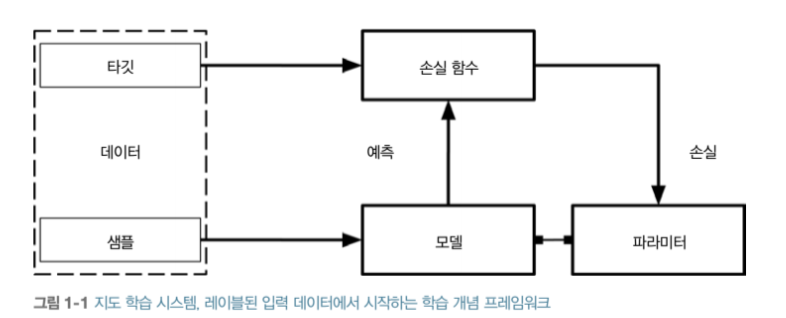
- 샘플(x) : 예측에 사용하는 아이템, 입력
- 타깃(y) : 샘플에 상응하는 레이블, 정답
- 모델 : 타겟 레이블 값을 예측하는 함수
- 파라미터(w) : 가중치, 모델 규정
- 예측(y hat) : 모델이 추측하는 타깃값, 추정이라고 부름
- 손실함수(L) : 훈련 데이터에 대한 예측이 타깃과 얼마나 떨어져있는지

##2) 경사 하강법을 사용한 훈련
- 지도 학습의 목적 : 주어진 데이터셋에서 손실함수 최소화하는 파라미터 고르기
- 경사하강법 : 파라미터 초깃값 추측, 손실함수의 값이 수용할만한 임계전 아래로 내려갈때까지 파라미터 반복 업데이트
- 확률적인 경사하강법 : 전통적과 다르게 데이터 포인트를 일부 선택하여 그래디언트 계산
- SGD : 데이터 포인트 하나 랜덤하게 사용
- 미니배치 SGD : 데이터 포인트 여러개 랜덤하게 사용
- 역전파 : 파라미터 반복적 업데이트하는 과정
- 각 에포크 : 정방향 계산(손실함수 계산) + 역방향 계산(그레디언트 사용해서 파라미터 업데이트)

# 2. 샘플과 타깃의 인코딩
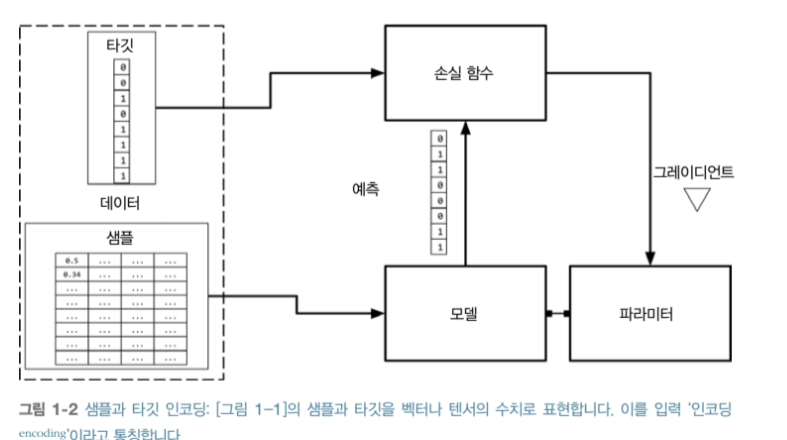


##1) 원-핫 표현 : 0벡터에서 시작해 단어에 상응하는 원소를 1로 설정
- 문장을 token으로 나눔->구두점 무시->소문자로 바꿈 -> 어휘사전
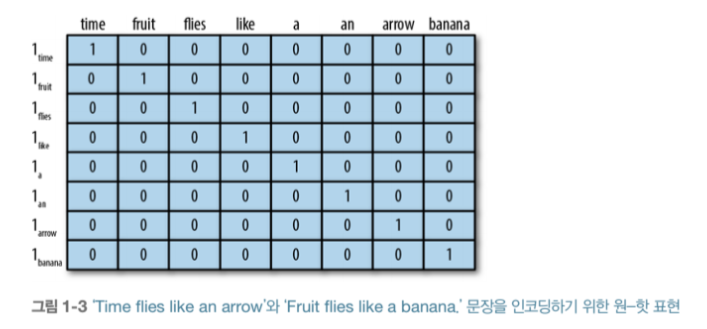



##2) TF 표현 (Term Frequency)
- 구나 문장의 TF 표현은 단어의 원-핫 표현을 합해서 만듦

<Axes: >

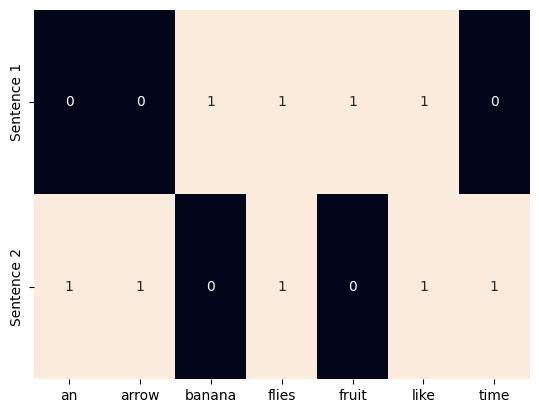

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = {'Time flies like an arrow.',
          'Fruit flies like a banana.'}

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out() #get_feature_names()이 get_feature_names_out 으로 바뀜
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

##3) TF-IDF 표현 (Term Frequency - Inverse Document Frequency)
- claim 같이 흔한 단어에는 특정 특허와 관련된 정보 x
- tetrafluoroethylene같이 희귀한 단어는 자주 나오지 않지만 특허문서 특징을 나타냄
- -> 역문서 빈도가 적합
- IDF는 흔한 토큰의 점수를 낮추고, 드문 토큰의 점수를 높임
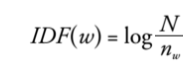
- 매우 흔한 단어 0
- 매우 드물면 최댓값은 log N(모든 문서의 단어개수)


<Axes: >

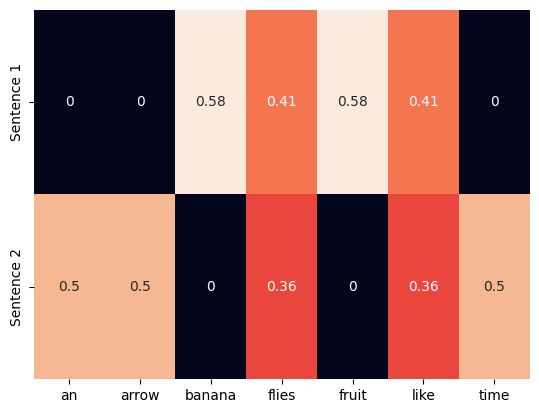

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = {'Time flies like an arrow.',
          'Fruit flies like a banana.'}

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1','Sentence 2'])

## 4) 타깃 인코딩
- 수치 타깃을 인코딩하는 방식 : 타깃을 범주형 구간으로 바꾸고 분류문제로 바꾸기
- ex) 음식점 리뷰를 보고 평점예측 등

# 3. 계산 그래프
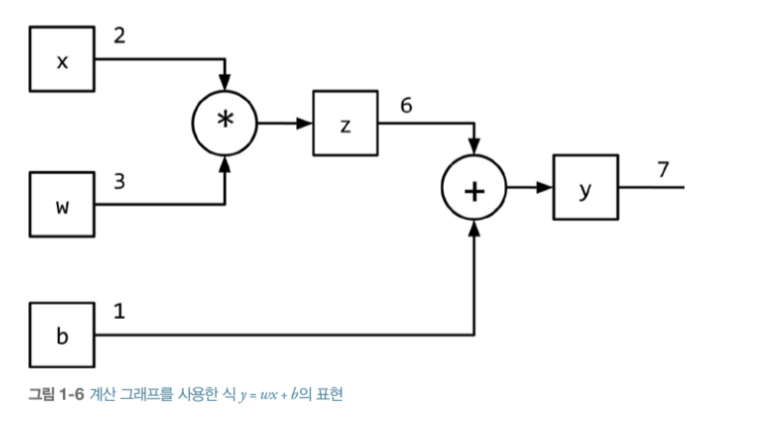
- z = wx
- y = z+b
- -> y = wx + b

#4. 파이토치 기초


##1) 파이토치 설치


## 2) 텐서 만들기

In [ ]:
# 파이토치에서 torch.Tensor로 텐서만들기

def describe(x):
  print("타입: {}".format(x.type()))
  print("크기: {}".format(x.shape))
  print("값: \n{}".format(x))

import torch
describe(torch.Tensor(2,3))

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[0.0000e+00, 3.1313e-41, 7.7052e+31],
#         [7.2148e+22, 1.5766e-19, 1.0256e-08]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-6.7500e-02,  4.3688e-41, -6.7500e-02],
        [ 4.3688e-41,  2.1707e-18,  1.9284e+31]])


In [ ]:
# 랜덤하게 초기화된 텐서 만들기

import torch
describe(torch.rand(2,3)) # 균등 분포
describe(torch.randn(2,3)) # 표준 정규 분포

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[0.0044, 0.0603, 0.2455],
#         [0.5975, 0.3189, 0.8915]])
# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[-0.6441,  0.7865, -0.7231],
#         [ 0.2896, -0.3968, -1.5246]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.0044, 0.0603, 0.2455],
        [0.5975, 0.3189, 0.8915]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.6441,  0.7865, -0.7231],
        [ 0.2896, -0.3968, -1.5246]])


In [ ]:
# filled() 메서드 사용하기

import torch

describe(torch.zeros(2,3))
x = torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[0., 0., 0.],
#         [0., 0., 0.]])
# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[1., 1., 1.],
#         [1., 1., 1.]])
# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[5., 5., 5.],
#         [5., 5., 5.]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [ ]:
# 파이썬 리스트로 텐서를 만들고 초기화하기

x = torch.Tensor([[1,2,3],
                  [4,5,6]])
describe(x)

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[1., 2., 3.],
#         [4., 5., 6.]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [ ]:
# 넘파이로 텐서를 만들고 초기화하기
import torch
import numpy as np

npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

# 타입: torch.DoubleTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[0.2353, 0.9055, 0.2123],
#         [0.9680, 0.7538, 0.4237]], dtype=torch.float64)

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.2870, 0.5755, 0.9111],
        [0.6172, 0.1868, 0.8419]], dtype=torch.float64)


## 3) 텐서 타입과 크기
- 기본 텐서 타입은 torch.FloatTensor
- float, long, double 등으로 타입을 바꿀 수 있음
- A) FloatTensor나 LongTensor과 같은 특정 타입의 생성자 직접 호출
- B) torch.tensor() 메서드 사용시 dtype 매개변수 사용

In [ ]:
x = torch.FloatTensor([[1,2,3],
                       [4,5,6]])
describe(x)
# 타입: torch.FloatTensor

x = x.long()
describe(x)
# 타입: torch.LongTensor

x = torch.tensor([[1,2,3],
                  [4,5,6]], dtype = torch.int64)
describe(x)
# 타입: torch.LongTensor

x = x.float()
describe(x)
# 타입: torch.FloatTensor

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


##4) 텐서 연산
- \+ \- \* / 사용 가능
- .add()함수 사용 가능

In [ ]:
import torch
x = torch.randn(2,3)
describe(x)

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[-1.3702,  1.4365, -0.2644],
#         [ 0.2085,  0.0688,  0.0670]])

describe(torch.add(x,x))

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[ 2.7955, -1.3012, -0.6948],
#         [-0.0937,  3.4324, -2.1622]])

describe(x+x)

# 타입: torch.FloatTensor
# 크기: torch.Size([2, 3])
# 값:
# tensor([[ 2.7955, -1.3012, -0.6948],
#         [-0.0937,  3.4324, -2.1622]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-1.6545,  0.1778,  1.5296],
        [ 0.7877, -0.0226, -0.5714]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-3.3090,  0.3555,  3.0592],
        [ 1.5753, -0.0453, -1.1428]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-3.3090,  0.3555,  3.0592],
        [ 1.5753, -0.0453, -1.1428]])


- 텐서의 특정 차원에 적용할 수 있는 연산
- 행은 0, 열은 1

In [ ]:
import torch
x = torch.arange(6)
describe(x)

# tensor([0, 1, 2, 3, 4, 5])

x = x.view(2,3) # 2,3 뷰로 바뀜
describe(x)

# tensor([[0, 1, 2],
#         [3, 4, 5]])

describe(torch.sum(x, dim = 0)) # 행이 0, 열을 모두 더해라

# tensor([3, 5, 7])

describe(torch.sum(x, dim = 1)) # 열이 1, 행을 모두 더해라

# tensor([ 3, 12])

describe(torch.transpose(x,0,1)) # transpose 해라

# tensor([[0, 3],
#         [1, 4],
#         [2, 5]])

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])
타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


## 5) 인덱싱, 슬라이싱, 연결

In [ ]:
import torch
x = torch.arange(6).view(2,3)
describe(x)

describe(x[:1, :2]) # 행은 1 미만, 열은 2 미만

describe(x[0,1]) # 0행 1열 가져오기

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])
타입: torch.LongTensor
크기: torch.Size([])
값: 
1


- 연속적이지 않은 위치 참조시 텐서 인덱스 참조하기
- index_select() 함수
- 파이토치 함수 사용시 필수조건 - 인덱스가 LongTensor

In [ ]:
indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim = 1, index = indices)) # 열이 index [0,2]인 숫자들 반환

# x -> tensor([[0, 1, 2],
#              [3, 4, 5]])

# tensor([[0, 2],
#         [3, 5]])

indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim = 0, index = indices)) # 행이 [0,0]인 숫자들 반환

row_indices = torch.arange(2).long() # 뒤에 long()을 붙이는 방법도 있음, [0,1]
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices]) # 0,0과 1,1이 출력됨

# tensor([0, 4])

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])
타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


- cat 사용하여 텐서 연결
- torch.cat() dim = 0 이면 새로운 행으로 연결, dim = 1이면 새로운 열로 연결

In [ ]:
import torch
x = torch.arange(6).view(2,3)
describe(x)
# tensor([[0, 1, 2],
#         [3, 4, 5]])

describe(torch.cat([x,x], dim = 0))

# tensor([[0, 1, 2],
#         [3, 4, 5],
#         [0, 1, 2],
#         [3, 4, 5]])

describe(torch.cat([x, x], dim = 1))

# tensor([[0, 1, 2, 0, 1, 2],
#         [3, 4, 5, 3, 4, 5]])

describe(torch.stack([x, x])) # stack처럼 두개를 따로 쌓음

# tensor([[[0, 1, 2],
#          [3, 4, 5]],

#         [[0, 1, 2],
#          [3, 4, 5]]])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


- 행렬 곱셈 (mm), 역행렬(inverse, pinverse), 대각합(trace) 등 수행

In [ ]:
import torch
x1 = torch.arange(6).view(2,3).float()
describe(x1)

# tensor([[0, 1, 2],
#         [3, 4, 5]])

x2 = torch.ones(3,2)
x2[:, 1] += 1
describe(x2)

# tensor([[1., 2.],
#         [1., 2.],
#         [1., 2.]])

describe(torch.mm(x1, x2))
# tensor([[ 3.,  6.],
#         [12., 24.]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


## 6) 텐서와 계산 그래프
- requires_grad 불리언 매개변수 1이면 그레디언트 기반 학습에 필요한 손실함수와 텐서의 그레디언트를 기록하는 부가연산 활성화시킴
- 정방향 계산 종료시 스칼라값 하나로 역방향 계산 수행
- 역방향 계산 -> 손실함수 평가에서 도출된 텐서에서 backward() 메서드 호출- > 정방향 계산에 참여한 텐서 객체에 대한 그레디언트 값 계산

In [ ]:
import torch
x = torch.ones(2,2, requires_grad = True)
describe(x)
print(x.grad is None)

# tensor([[1., 1.],
#         [1., 1.]], requires_grad=True) # 그레디언트 기록 활성화시킴

y = (x + 1) * (x + 5) + 3
describe(y)
print(x.grad is None)

# tensor([[15., 15.],
#         [15., 15.]], grad_fn=<AddBackward0>)

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

# 15.0
# False

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True
타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
False


## 7) CUDA 텐서
- CUDA API를 활용하여 GPU 활용 가능
- 파이토치는 텐서를 CPU에서 GPU로 전송하여 CUDA 텐서 쉽게 만들 수 있음
- torch.cuda,is_available()로 GPU 사용할 수 있는지 확인
- torch.device()로 장치 이름 가져옴
- .to(device) 메서드를 사용해 향후 초기화되는 모든 텐서를 해당 장치로 이동

In [ ]:
import torch
print(torch.cuda.is_available)

# 바람직한 방법 : 장치에 무관한 텐서 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

x = torch.rand(3,3).to(device)
describe(x)

# tensor([[0.0793, 0.4934, 0.1722],
#         [0.1713, 0.7912, 0.5764],
#         [0.2313, 0.9072, 0.3379]], device='cuda:0')

<function is_available at 0x79c97effa050>
cuda
타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.0793, 0.4934, 0.1722],
        [0.1713, 0.7912, 0.5764],
        [0.2313, 0.9072, 0.3379]], device='cuda:0')


- CUDA 객체와 CUDA가 아닌 객체를 다루려면 두 객체가 같은 장치에 있는지 확인해야 오류가 안남

In [ ]:
y = torch.rand(3,3)
# x + y

# RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

# tensor([[0.9822, 0.6852, 0.4912],
#         [0.7402, 0.8755, 0.9489],
#         [1.1461, 1.5980, 0.5215]])

tensor([[0.9822, 0.6852, 0.4912],
        [0.7402, 0.8755, 0.9489],
        [1.1461, 1.5980, 0.5215]])

- 병렬 계산은 일반적으로 GPU에서 수행하고 최종 결과만 CPU에 전송하는 방식
- CUDA 장치가 여럿(GPU가 여러개)라면 프로그램 실행시 다음처럼 CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py 환경 변수 사용

# 5. 연습문제

In [ ]:
# 1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요
import torch
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x = x.unsqueeze(0)

# 앞에 차원이 추가됨

In [ ]:
# 2. 이전 텐서에 추가한 차원을 삭제하세요.
x.squeeze(0)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# 3. 범위가 [3, 7)이고 크기가 5X3인 랜덤한 텐서를 만드세요.
y = torch.randint(3,7, (5,3))
y

tensor([[6, 3, 3],
        [6, 4, 6],
        [5, 3, 3],
        [5, 4, 5],
        [4, 5, 6]])

In [ ]:
# 4. 정규 분포(평균=0, 표준편차=1)를 사용해 텐서를 만드세요.
z = torch.randn(3,3)
z

tensor([[-0.1360,  1.2724, -0.9949],
        [ 0.5184, -0.3976,  0.2353],
        [-0.3799,  1.7061, -0.0073]])

In [ ]:
# 5. 텐서 torch.Tensor([1, 1. 1. 0. 1])에서 0이 아닌 원소의 인덱스를 추출하세요.
a = torch.Tensor([1, 1, 1, 0, 1])
torch.nonzero(a)

tensor([[0],
        [1],
        [2],
        [4]])

In [ ]:
# 6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.
b = torch.rand(3,1)
torch.stack([b,b,b,b])

tensor([[[0.8148],
         [0.8856],
         [0.9040]],

        [[0.8148],
         [0.8856],
         [0.9040]],

        [[0.8148],
         [0.8856],
         [0.9040]],

        [[0.8148],
         [0.8856],
         [0.9040]]])

In [ ]:
# 7. 2차원 행렬 두 개(a-torch.rand(3,4.5), b-torch.rand (3,5,4))의 배치 행렬 곱셈을 계산하세요.
import torch
a=torch.rand(3,4,5)
b=torch.rand(3,5,4)

print(torch.bmm(a,b))

tensor([[[0.9714, 1.6478, 2.2953, 2.5280],
         [1.3956, 1.6678, 2.1239, 2.1196],
         [1.0102, 1.0720, 1.3910, 1.2178],
         [1.0700, 1.1120, 1.7355, 1.5708]],

        [[0.8230, 1.3228, 0.6999, 1.4848],
         [0.8470, 1.6895, 0.4616, 1.7132],
         [0.4642, 0.6477, 0.3360, 0.8350],
         [1.0208, 1.8605, 0.7149, 2.3107]],

        [[1.2367, 1.4230, 0.9159, 1.6588],
         [1.7604, 1.4573, 0.8394, 2.0312],
         [1.1412, 1.2215, 0.6102, 1.3054],
         [1.6124, 1.7109, 1.0136, 1.4544]]])


In [ ]:
# 8. 3차원 행렬(a=torch.rand(3,4,5))과 2차원 행렬(b=torch.rand(5,4))의 배치 행렬 곱셈을 계산하세요
a=torch.rand(3,4,5)
b=torch.rand(5,4) # (3,5,4)

b_expand = b.unsqueeze(0).expand(3,-1,-1)
result = torch.bmm(a, b_expand)
result

tensor([[[1.2472, 1.8698, 1.3846, 1.0132],
         [0.9952, 1.3206, 1.2539, 0.8319],
         [1.7461, 1.5073, 1.2483, 0.6901],
         [0.6772, 1.1877, 1.0783, 0.7659]],

        [[1.3515, 1.8309, 1.3933, 1.0245],
         [1.0650, 1.0463, 1.0866, 0.6539],
         [1.2244, 1.4754, 1.4066, 1.1229],
         [1.3088, 1.5131, 0.9535, 0.8631]],

        [[1.7009, 2.3163, 1.8438, 1.5268],
         [1.6139, 1.8182, 1.7535, 0.9653],
         [1.0752, 1.2770, 1.1211, 0.8274],
         [1.2852, 1.5930, 1.0911, 0.8144]]])